# **FASE IV: Modelo no supervisado DBSCAN 🤡**

In [17]:
# Librerías básicas

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
# import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV

import warnings #Advertencias
warnings.filterwarnings('ignore')

monopoly = pd.read_parquet('../monopoly_cleaned_parquet')

## **CLUSTERING JERÁRQUICO**

In [3]:
columns_to_drop = ['FlgAct_sum', 'FlgActCN_sum', 'FlgActCI_sum', 'FlgActAN_sum', 'FlgActAI_sum', 'FlgActPAT_sum',
                   'FlgActCCPC_sum', 'FlgActCCOT_sum', 'FlgActCOL_sum', 'Fac_avg', 'Txs_avg', 'FacCN_avg', 'TxsCN_avg',
                   'FacCI_avg', 'TxsCI_avg', 'FacAN_avg', 'TxsAN_avg', 'FacAI_avg', 'TxsAI_avg', 'FacPAT_avg', 'TxsPAT_avg',
                   'FacCCPC_avg', 'TxsCCPC_avg', 'FacCCOT_avg', 'TxsCCOT_avg', 'FacCOL_avg', 'TxsCOL_avg', 'FacDebCom_avg',
                   'TxsDebCom_avg', 'FacDebAtm_avg', 'TxsDebAtm_avg', 'Col_avg', 'ColL1T0_avg', 'ColL1TE_avg', 'ColL2T0_avg',
                   'ColL2AC_avg', 'ColL2CC_avg', 'ColMx_avg', 'PagoNac_avg', 'PagoInt_avg', 'EeccNac_avg', 'EeccInt_avg',
                   'UsoL1_avg', 'UsoL2_avg', 'UsoLI_avg']

monopoly = monopoly.drop(columns=columns_to_drop)


In [4]:
monopoly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51121 entries, 0 to 51120
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Subsegmento   51121 non-null  float64
 1   Sexo          51121 non-null  float64
 2   Region        51121 non-null  float64
 3   Edad          51121 non-null  float64
 4   Renta         51121 non-null  float64
 5   Antiguedad    51121 non-null  float64
 6   Internauta    51121 non-null  float64
 7   Adicional     51121 non-null  float64
 8   Dualidad      51121 non-null  float64
 9   Monoproducto  51121 non-null  float64
 10  Ctacte        51121 non-null  float64
 11  Consumo       51121 non-null  float64
 12  Hipotecario   51121 non-null  float64
 13  Debito        51121 non-null  float64
 14  CambioPin     51121 non-null  float64
 15  Cuentas       51121 non-null  float64
 16  TC            51121 non-null  float64
 17  CUPO_L1       51121 non-null  float64
 18  CUPO_L2       51121 non-nu

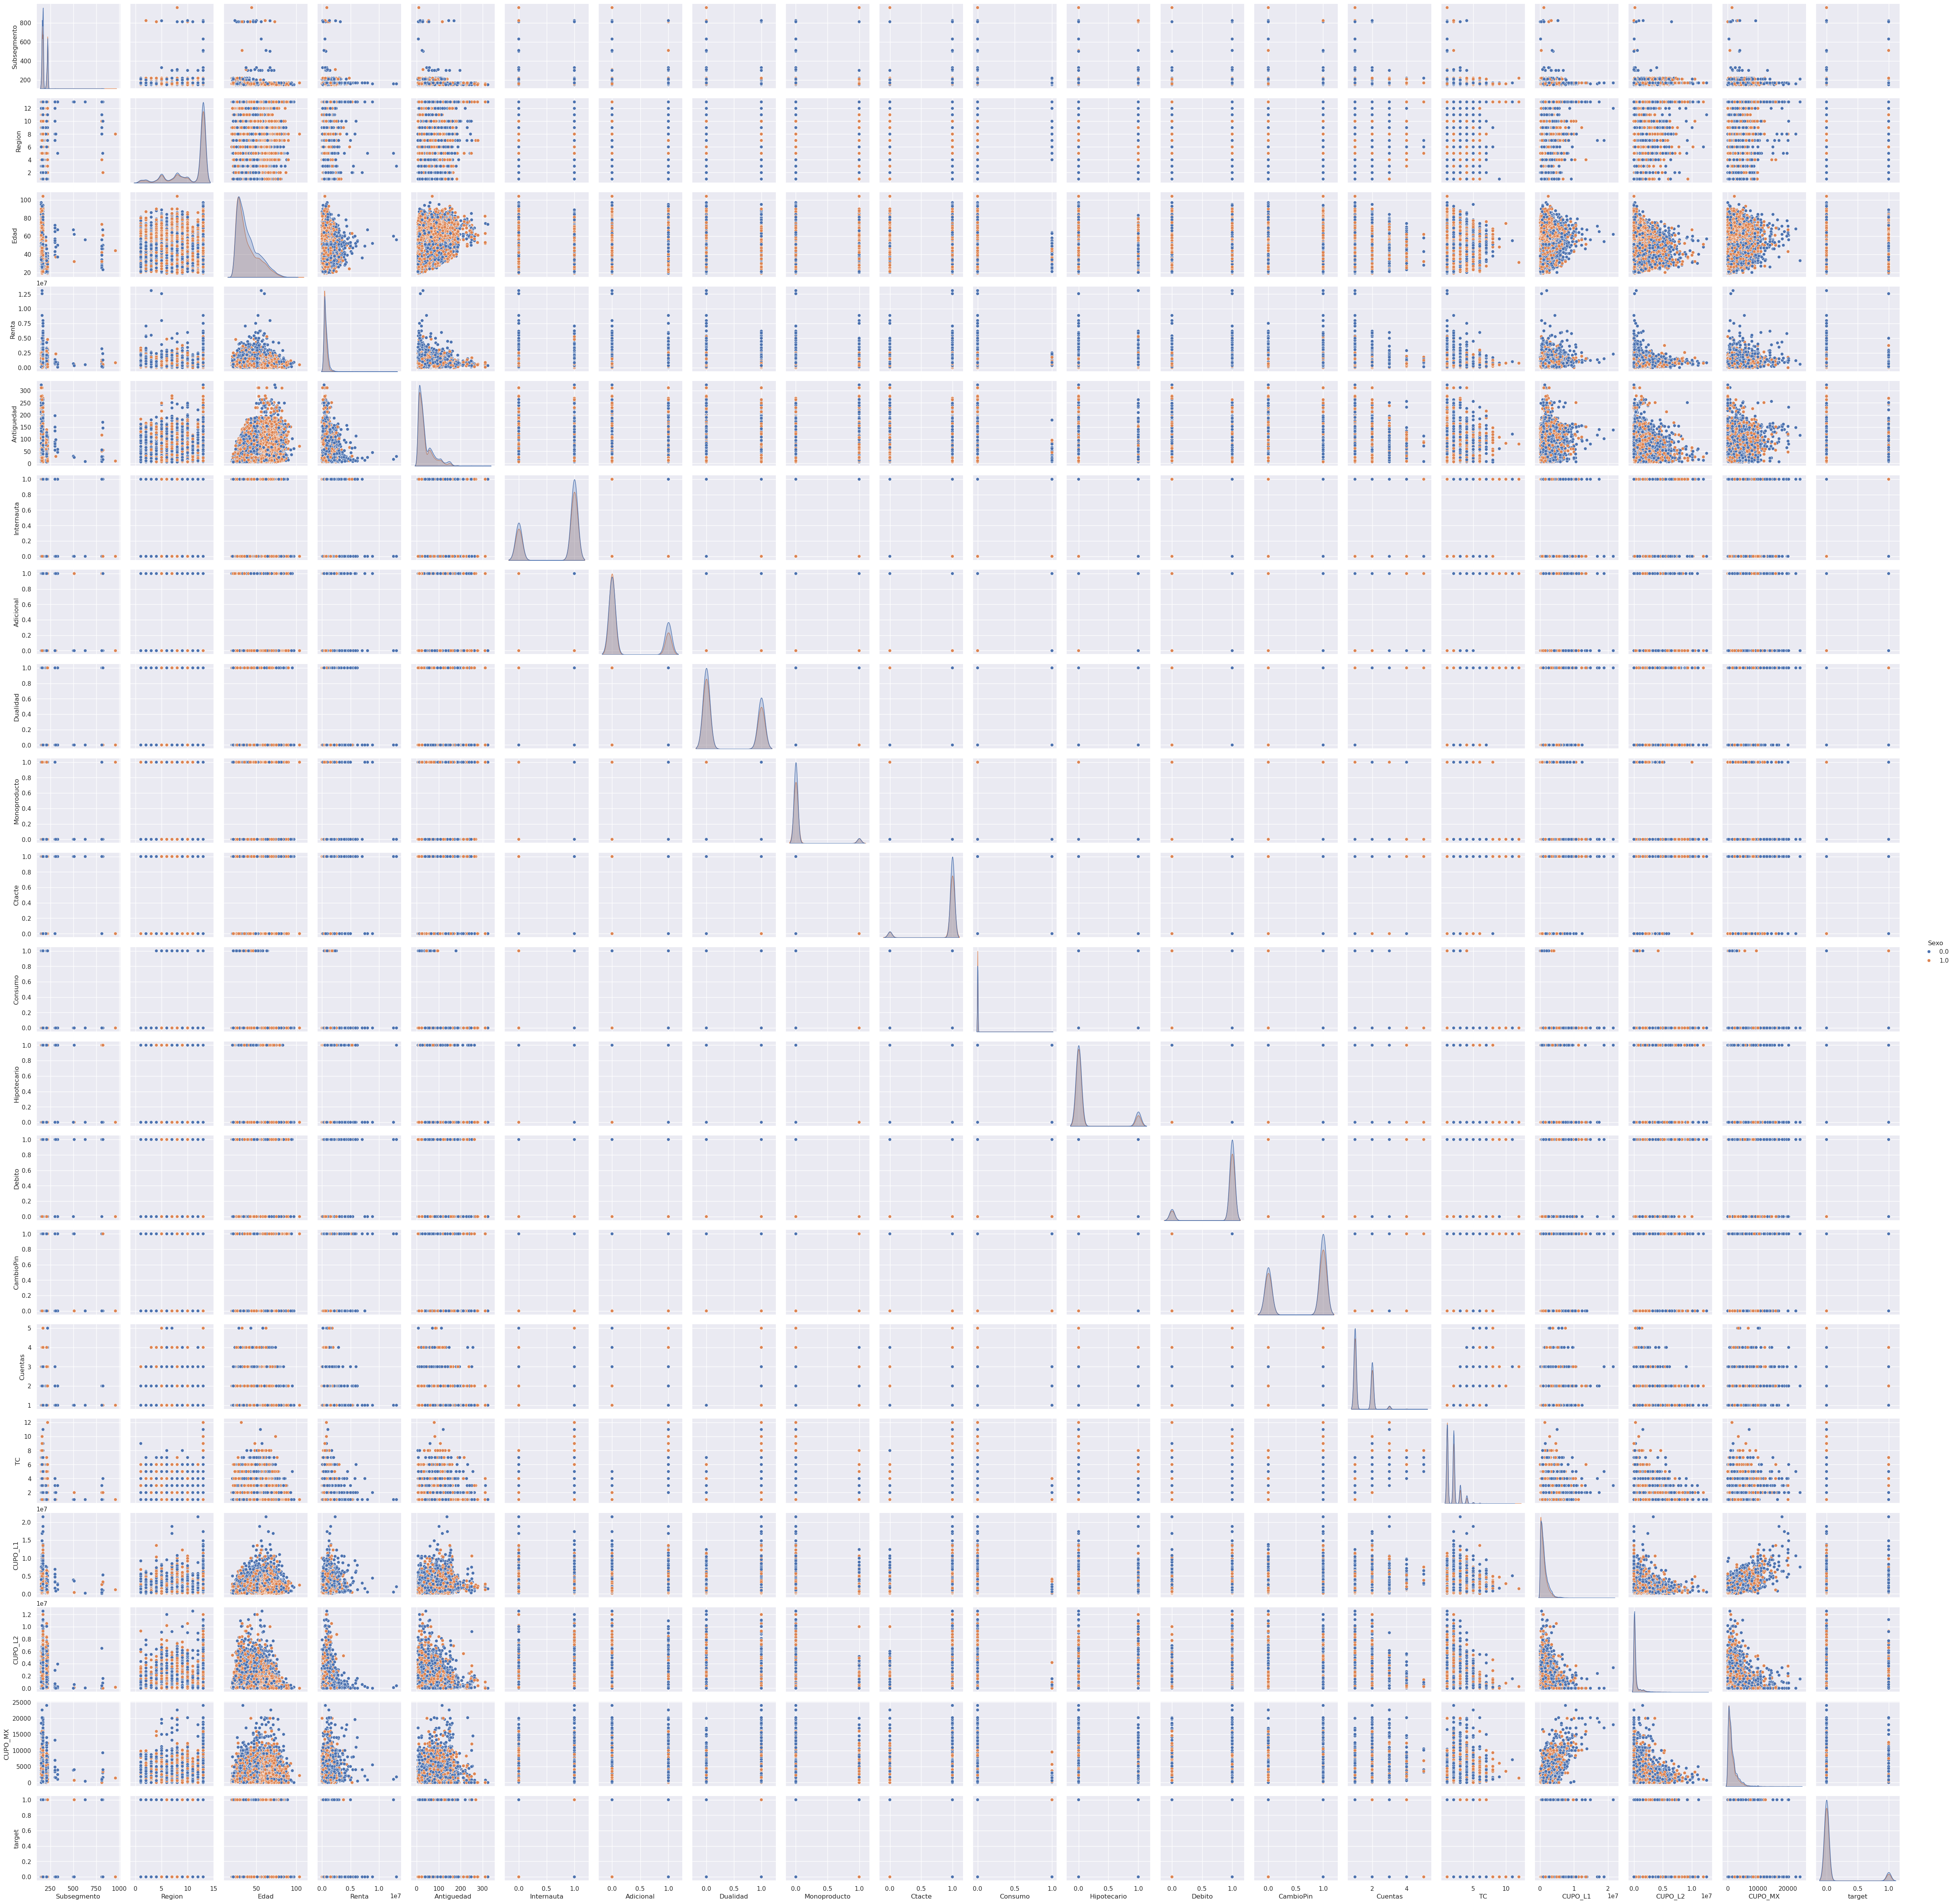

In [4]:
#Pair-plot
sns.set()
sns.pairplot(monopoly,hue='Sexo')
plt.show()

## Modelo 1 🤡 (DBSCAN con StandarScaler)

In [12]:
#'Edad' y 'renta'
X = monopoly.iloc[:, [3,4]].values

# Normalización de los datos
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

In [7]:
from sklearn.cluster import DBSCAN

modelo_1 = DBSCAN()

In [7]:
Y_hat = modelo_1.fit_predict(X_sc)

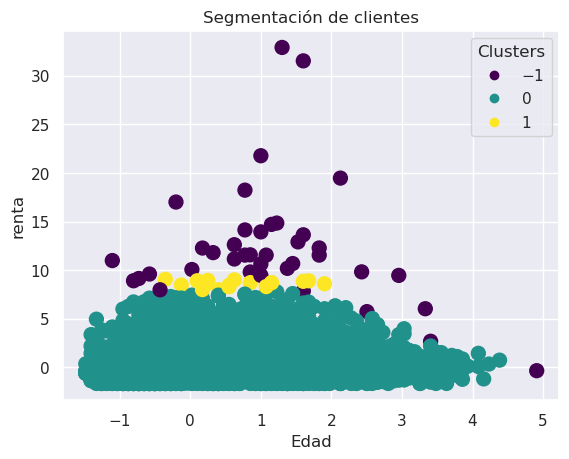

In [8]:
# Visualiza los clusters
scatter = plt.scatter(X_sc[:, 0], X_sc[:, 1], c=Y_hat, cmap='viridis', s=100)
plt.xlabel('Edad')
plt.ylabel('renta')
plt.title('Segmentación de clientes')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

In [9]:
SS_1 = silhouette_score(X_sc, Y_hat)

print("Silhouette Score:", SS_1)

Silhouette Score: 0.8075062210359494


## Modelo 2 🤡 (DBSCAN con StandarScaler cambios en epsilon, samples y algoritmo brute)

In [13]:
modelo_2 = DBSCAN(eps= 0.2, min_samples=8, algorithm='brute')

In [14]:
Y_hat = modelo_2.fit_predict(X_sc)

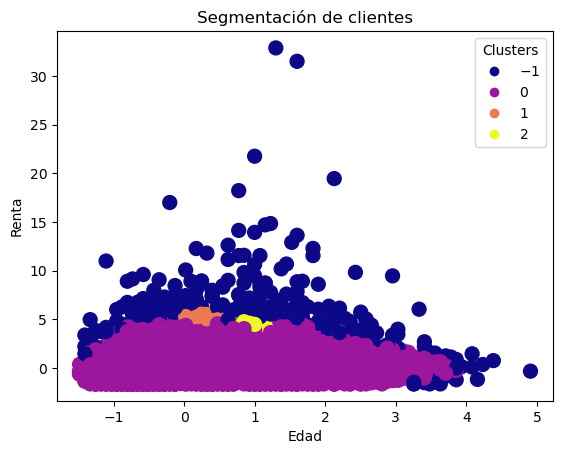

In [15]:
# Visualiza los clusters
scatter = plt.scatter(X_sc[:, 0], X_sc[:, 1], c=Y_hat, cmap='plasma', s=100)
plt.xlabel('Edad')
plt.ylabel('Renta')
plt.title('Segmentación de clientes')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

In [16]:
SS_2 = silhouette_score(X_sc, Y_hat)

print("Silhouette Score:", SS_2)

Silhouette Score: 0.6420792028347263


## Modelo 3 🤡 (DBSCAN con StandarScaler y busqueda de hyperparametro )

In [21]:
# Crea una función de puntuación personalizada basada en el Silhouette Score
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    num_clusters = len(np.unique(labels))
    if num_clusters <= 1:
        return 0.0  # Evita divisiones por cero
    else:
        return silhouette_score(X, labels)

# Define la cuadrícula de hiperparámetros para ajustar
param_grid = {
    'eps': [0.5],
    'min_samples': [5],
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
    'algorithm': ['ball_tree', 'kd_tree']
}

# Crea un modelo DBSCAN
modelo = DBSCAN()

# Realiza la búsqueda de hiperparámetros utilizando GridSearchCV con la función de puntuación personalizada
grid_search = GridSearchCV(modelo, param_grid, cv=2, scoring=silhouette_scorer, n_jobs=-1)
grid_search.fit(X_sc)

# Obtiene los mejores hiperparámetros
best_params = grid_search.best_params_
best_params

{'algorithm': 'ball_tree', 'eps': 0.5, 'metric': 'chebyshev', 'min_samples': 5}

In [22]:
modelo_3 = DBSCAN(**best_params)

In [23]:
Y_hat = modelo_3.fit_predict(X_sc)

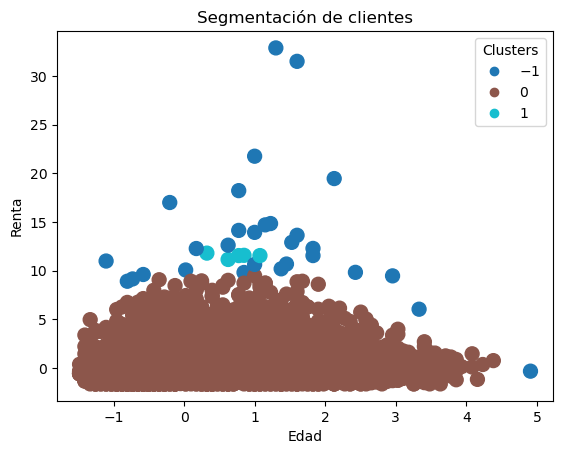

In [24]:
# Visualiza los clusters
scatter = plt.scatter(X_sc[:, 0], X_sc[:, 1], c=Y_hat, cmap='tab10', s=100)
plt.xlabel('Edad')
plt.ylabel('Renta')
plt.title('Segmentación de clientes')

# Leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")

#Mostrar grafico
plt.show()

In [25]:
SS_3 = silhouette_score(X_sc, Y_hat)

print("Silhouette Score:", SS_3)

Silhouette Score: 0.8558341921869069


## Comparacion modelos DBSCAN 🤡

In [26]:
from IPython.display import display
import pandas as pd

# Assuming you have the Silhouette Scores
silhouette_scores = [0.8075062210359494, 0.6420792028347263, 0.8558341921869069]

# Create a DataFrame
data = {'Silhouette Score': silhouette_scores}
df = pd.DataFrame(data)

# Display the DataFrame as a table
display(df)


Silhouette Score
0          0.807506
1          0.642079
2          0.855834

In [28]:
import joblib

joblib.dump({modelo_3}, '{dbscan_modelo_3.pkl}')

['{dbscan_modelo_3.pkl}']